<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulations/blob/main/Probability_Gamma_and_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.stats import weibull_min
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def T_m(m, eta, delta, alpha, beta):
    sum_of_y = 0
    y = weibull_min.rvs(c=beta, scale=alpha)
    sum_of_x = np.sum(np.random.gamma(eta, delta, m))
    while sum_of_x > y:
        sum_of_y = sum_of_y + y
        sum_of_x = np.sum(np.random.gamma(eta, delta, m))
        y = weibull_min.rvs(c=beta, scale=alpha)
    return(sum_of_y + sum_of_x)

In [4]:
def P_mt1(t, m, eta, delta, alpha, beta, N=150): # N = 150000
    res = np.repeat(np.nan, N)
    Prob = np.repeat(np.nan, len(m))
    for i in range(len(m)):
        for j in range(N):
             res[j] = t < T_m(m[i], eta, delta, alpha, beta)
        Prob[i] = np.sum(res)/N
    return(Prob)

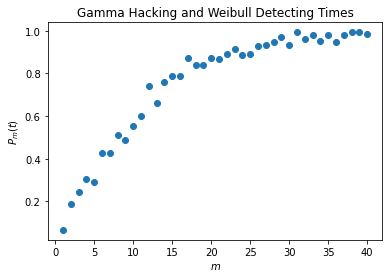

In [11]:
m = 40
eta = 0.02
delta = 0.5
alpha = 0.1
beta = 0.3
t = 0.002
P_mt = P_mt1(t, range(1, m+1), eta, delta, alpha, beta)
plt.scatter(range(1, m+1), P_mt)
plt.xlabel(r'$m$')
plt.ylabel(r'$P_m(t)$')
plt.title('Gamma Hacking and Weibull Detecting Times')
plt.show()

In [7]:
def P_mt2(t, m, eta, delta, alpha, beta, N=300): # N: iterations 30000
    res = np.repeat(np.nan, N)
    for j in range(N):
        res[j] = t < T_m(m, eta, delta, alpha, beta)
    Prob = np.sum(res)/N
    return (Prob)

In [18]:
m = 40
eta = 0.02
delta = 5
alpha = 1
beta = 3
m = np.array(range(1, m+1))
t = np.array(np.linspace(0.001, 1, len(m)))
m_axis = np.repeat(np.nan, len(m)*len(t))
t_axis = np.repeat(np.nan, len(m)*len(t))
P_axis = np.repeat(np.nan, len(m)*len(t))
index = 0
for i in range(len(m)):
    for j in range(len(t)):
        m_axis[index] = m[i]
        t_axis[index] = t[j]
        P_axis[index] = P_mt2(t_axis[index], int(m_axis[index]), eta, delta, alpha, beta)
        index += 1

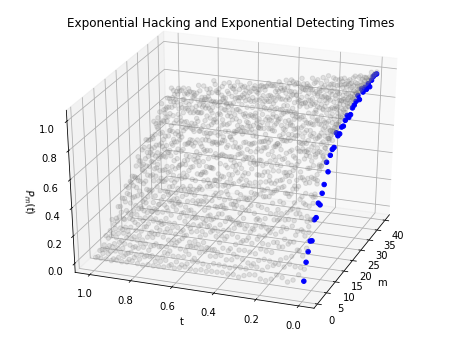

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(m_axis, t_axis, P_axis, alpha=0.2, c='grey')
ax.scatter3D(m, np.repeat(0.002, len(m)), P_mt, alpha=1, c='blue')
ax.view_init(30, 200)
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_xlabel('m')
ax.set_ylabel('t')
ax.set_zlabel(r'$P_m(t)$')
ax.set_title('Exponential Hacking and Exponential Detecting Times')
plt.show()